**1. Mount the Drive for data storage.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import the Libraries**

In [2]:
import json
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

**3. Define Your stocks Here**

In [ ]:
stock = ['DIVISLAB','HAL']

**4. Create a function which fetch data from NSE website**

In [ ]:
def stock_analysis(stocks):
    stock_name=[]
    stock_closePrice=[]
    trade_date=[]
    stock_lastPrice=[]
    for i in stocks:
        print(i)
        # Using request Lib to fetch data from the website
        stock_url  = 'https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol='+str(i)
        headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36'}
        response = requests.get(stock_url, headers=headers)
        # If we get the expected respone
        if str(response) == '<Response [200]>': #if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser') # For html parse use Butifulsoup
            data_array = soup.find(id='responseDiv').getText()
            jsonStr = json.loads(data_array) # Converted the test data into JSON form using json.loads
            #fetching Required data from the JSON 
            date=jsonStr['tradedDate']
            trade_date.append(date)
            name = jsonStr['data'][0]['symbol']
            stock_name.append(name)
            close_p = jsonStr['data'][0]['closePrice']
            stock_closePrice.append(close_p)
            last_p = jsonStr['data'][0]['lastPrice']
            stock_lastPrice.append(last_p)
        else:
            print("Error : Requst cannot be completed!")
    # Now Creating a DataFrame for the given stocks where rows = stocks name and Cloumns = Dates
    stock_data = pd.DataFrame(
    {'stock_name': stock_name,
     str(date): stock_closePrice,
    })
    return stock_data,date

**5. Creating a temprory variable to store stocks data and Date**

In [ ]:
temp,date=stock_analysis(stock)

**6. Cleaning the data and type casting it to float**

In [ ]:
temp[date] = temp[date].str.replace(",", "")
temp[date] = temp[date].astype(float)

If you are runing it for the first time then you need to run the commented line to store the temp data to the drive.

In [ ]:
#temp.to_csv('file1.csv')
temp

**7. Reading data from the drive**

In [ ]:
sd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/file1.csv', index_col=[0])
sd

In [ ]:
sd.info()

**8. Joining two dataframes with concat**

In [ ]:
vertical_concat = pd.concat([sd, temp[date]], axis=1)
vertical_concat

**9. Saving data as csv file in the drive**

In [ ]:
vertical_concat.to_csv('/content/drive/MyDrive/Colab Notebooks/stocks/file1.csv')

**10. Reading data from the drive to perform EDA**

In [3]:
sd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/file1.csv', index_col=[0])

In [ ]:
df = sd.copy()
df

**11. Importing Matplotlib library**

In [5]:
import matplotlib.pyplot as plt

**12. Creating new column for total profit/loss**

In [ ]:
df['TP/TL']= df[df.columns[-1]] - df[df.columns[1]]
df

**13. Analysing data with graph** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


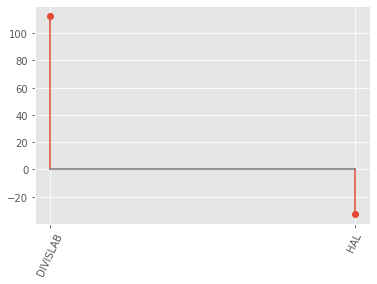

In [8]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(6,4))
# make data
#np.random.seed(3)
x = df['stock_name'][:2]
y = df['TP/TL'][:2]

plt.stem(x, y)
plt.xticks(rotation=65)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


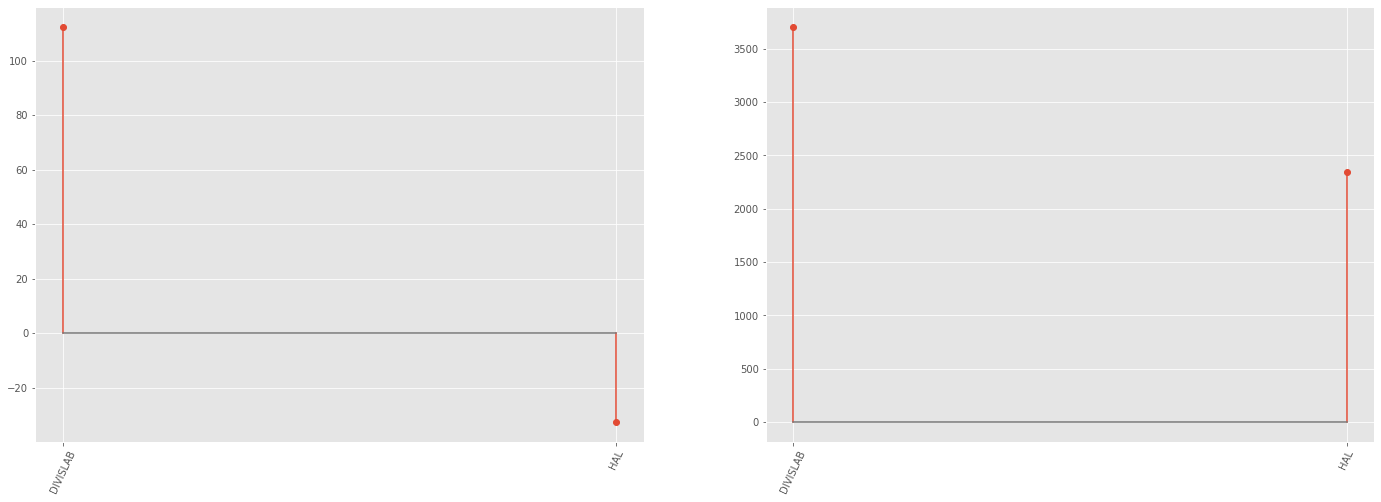

In [11]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,8))
x = df['stock_name'][:2]
y = df['TP/TL'][:2]
plt.subplot(1, 2, 1)
#plt.plot(x, y)
plt.stem(x, y)
plt.xticks(rotation=65)
x = df['stock_name'][:2]
y = df[df.columns[-2]][:2]
plt.subplot(1, 2, 2)
#plt.plot(x, y)
plt.stem(x, y)
plt.xticks(rotation=65)
plt.show()

In [13]:
x=[]
y=[]
xl=[]
yl=[]
for i in range(0,2):
  if df['TP/TL'][i]>0:
    x.append(df['stock_name'][i])
    y.append(df['TP/TL'][i])
  else:
    xl.append(df['stock_name'][i])
    yl.append(df['TP/TL'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


([0, 1], <a list of 2 Text major ticklabel objects>)

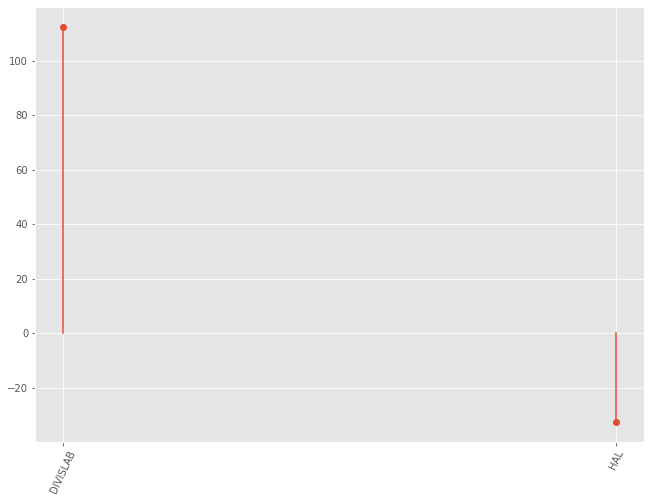

In [14]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
#plt.plot(x, y)
plt.stem(x, y)
plt.stem(xl, yl)
plt.xticks(rotation=65)

([0, 1], <a list of 2 Text major ticklabel objects>)

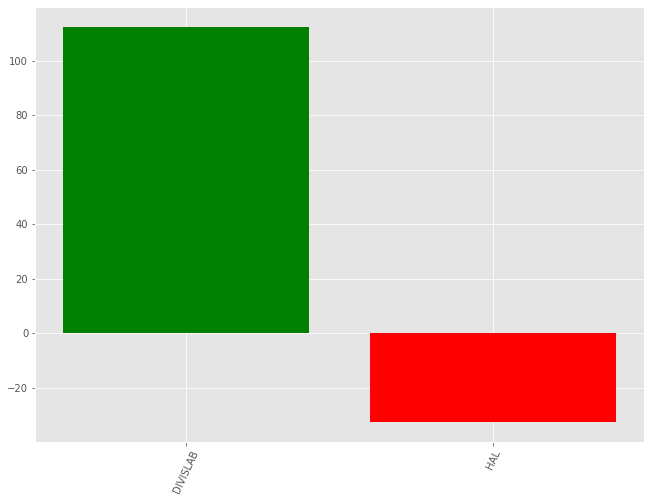

In [15]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
#plt.plot(x, y)
plt.bar(x, y, color = "g")
plt.bar(xl, yl, color = "r")
plt.xticks(rotation=65)